In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import src.data_handler as data_handler
import src.models as models
import os
from IPython.display import display

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

## 1 )

### a )

In [2]:
clustering_df : pd.DataFrame = pd.read_csv(f"{project_root}/TP04/data/raw/clustering.csv").drop(columns=['index'])
clustering_df.info()
clustering_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       4999 non-null   int64
 1   B       4999 non-null   int64
dtypes: int64(2)
memory usage: 78.2 KB


,A,B
0,812954,643720
1,868217,609046
2,920248,607272
3,841621,639394
4,843907,598777


In [3]:
X : np.ndarray = clustering_df.to_numpy()
X_stardardized : np.ndarray = (X - X.mean(axis=0, keepdims=True)) / X.std(axis=0, keepdims=True)

In [4]:
# clustering_normalized_df : pd.DataFrame = clustering_df / clustering_df.max()
# clustering_normalized_df.info()
# clustering_normalized_df.head()
# clustering_normalized_df.to_csv(f"{project_root}/TP04/data/processed/clustering_normalized.csv")

In [5]:
k_means_01 : models.KMeans = models.KMeans(X, 9)
k_means_01.fit_centroids(print_iterations=True, runs=20)
print("")
print("CENTROIDES")
for c, i in zip(k_means_01.mu, range(1, len(k_means_01.mu) + 1)):
    print(f"Cluster = {i:02d} | A: {c[0]}, B: {c[1]}")

K-MEANS: done at iteration  16
K-MEANS: done at iteration  26
K-MEANS: done at iteration  18
K-MEANS: done at iteration  14
K-MEANS: done at iteration  30
K-MEANS: done at iteration  13
K-MEANS: done at iteration  13
K-MEANS: done at iteration  15
K-MEANS: done at iteration  20
K-MEANS: done at iteration  18
K-MEANS: done at iteration  21
K-MEANS: done at iteration  15
K-MEANS: done at iteration  42
K-MEANS: done at iteration  24
K-MEANS: done at iteration  19
K-MEANS: done at iteration  12
K-MEANS: done at iteration  10
K-MEANS: done at iteration  25
K-MEANS: done at iteration  33
K-MEANS: done at iteration  19

CENTROIDES
Cluster = 01 | A: 457315, B: 414700
Cluster = 02 | A: 738408, B: 492901
Cluster = 03 | A: 208775, B: 474202
Cluster = 04 | A: 819010, B: 726787
Cluster = 05 | A: 156898, B: 236944
Cluster = 06 | A: 568850, B: 787475
Cluster = 07 | A: 349201, B: 683524
Cluster = 08 | A: 734597, B: 195847
Cluster = 09 | A: 459401, B: 199226


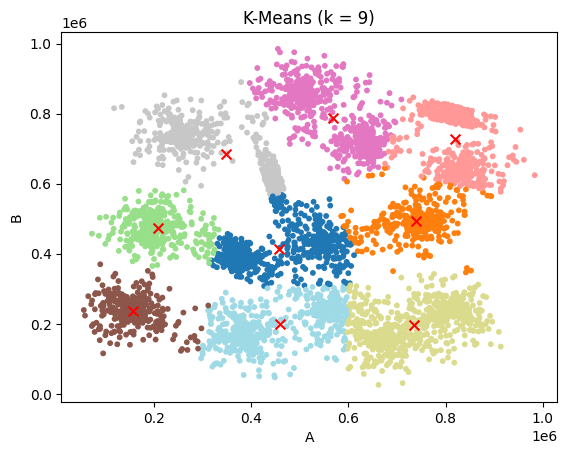

In [6]:
k_means_01.plot_clusters_2d()

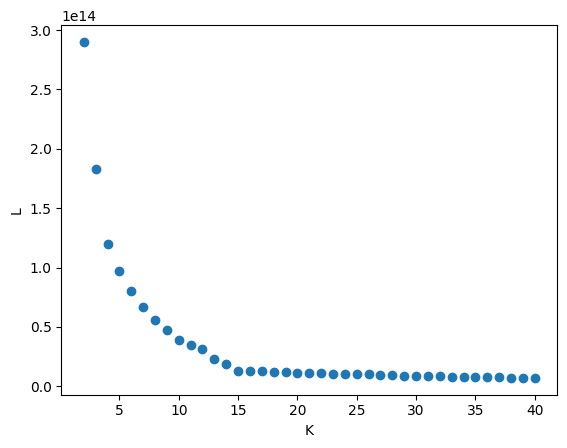

In [7]:
k_max : int = 40
k_model : models.KMeans
losses_k : list[float] = []
valores_k : list[int] = list(range(2, k_max+1))
for k in range(2, k_max + 1):
    k_model = models.KMeans(X, k)
    k_model.fit_centroids(runs=5)
    losses_k.append(k_model.calculate_distance_squared_error())
plt.scatter(range(2, k_max+1), losses_k)
plt.xlabel("K")
plt.ylabel("L")
plt.show()

### b )

In [8]:
gmm_model : models.GMM = models.GMM(X, 15)
gmm_model.fit_gaussians(use_k_means_centroids=True, max_iterations=10000, runs=20, print_iterations=True);
# print("\nCENTROIDES")
# for c, i in zip(mu, range(1, len(mu) + 1)):
#     print(f"Cluster = {i:02d} | A: {c[0]}, B: {c[1]}")

GMM: done at iteration 506
GMM: done at iteration 499
GMM: done at iteration 503
GMM: done at iteration 499
GMM: done at iteration 230
GMM: done at iteration 506
GMM: done at iteration 503
GMM: done at iteration 499
GMM: done at iteration 503
GMM: done at iteration 497
GMM: done at iteration 503
GMM: done at iteration 503
GMM: done at iteration 499
GMM: done at iteration 506
GMM: done at iteration 293
GMM: done at iteration 503
GMM: done at iteration 281
GMM: done at iteration 503
GMM: done at iteration 503
GMM: done at iteration 506


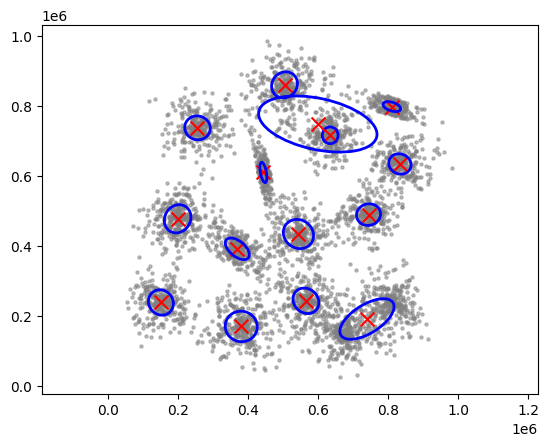

In [9]:
gmm_model.plot_gmm()

In [10]:
print("LOG LIKELIHOOD: ", gmm_model.log_likelihood())

LOG LIKELIHOOD:  -114817.04008406834


### c )

In [11]:
dbscan_model : models.DBScan = models.DBScan(X_stardardized)
dbscan_model.fit_labels(epsilon=0.07, min_points=10, print_iterations=True);

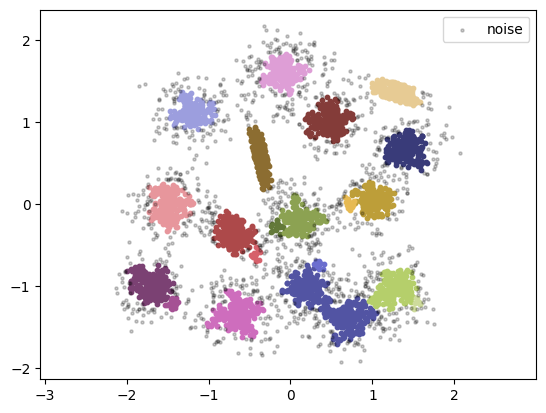

In [12]:
dbscan_model.plot_dbscan()